<a href="https://colab.research.google.com/github/jotaperes/Bootcamp-IGTI-DATA-SCIENCE/blob/main/K_means.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb



In [2]:
clientes = pd.read_excel("dados_clientes.xlsx")
estados = pd.read_csv("estados_brasileiros.csv", sep = ";", encoding='latin-1')
idade = pd.read_csv("idade_clientes.csv", sep = ";")

#Início do tratamento dos Dados

In [3]:
clientes.describe()

,id_cliente,peso,colesterol,id_estado
count,547.00000,542.000000,547.000000,547.000000
mean,274.00000,143.440959,170.433272,13.833638
std,158.04957,30.836868,39.147189,7.593117
min,1.00000,95.000000,102.000000,1.000000
25%,137.50000,116.000000,136.000000,7.000000
50%,274.00000,140.000000,169.000000,13.000000
75%,410.50000,171.000000,208.000000,20.000000
max,547.00000,203.000000,235.000000,27.000000


In [4]:
clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 547 entries, 0 to 546
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id_cliente  547 non-null    int64  
 1   peso        542 non-null    float64
 2   colesterol  547 non-null    int64  
 3   genero      547 non-null    object 
 4   id_estado   547 non-null    int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 21.5+ KB


In [5]:
estados.describe()

,id_estado
count,27.000000
mean,14.000000
std,7.937254
min,1.000000
25%,7.500000
50%,14.000000
75%,20.500000
max,27.000000


In [6]:
idade.describe()

,id_cliente,idade
count,547.00000,547.000000
mean,274.00000,42.791590
std,158.04957,15.160209
min,1.00000,16.000000
25%,137.50000,30.000000
50%,274.00000,42.000000
75%,410.50000,55.000000
max,547.00000,70.000000


##Verificando a ausência de dados

In [7]:
estados.isna().sum()

id_estado       0
estado          0
sigla_estado    0
pais            2
dtype: int64

In [8]:
clientes.isna().sum()

id_cliente    0
peso          5
colesterol    0
genero        0
id_estado     0
dtype: int64

In [9]:
idade.isna().sum()

id_cliente    0
idade         0
dtype: int64

Existem três formas de tratar o problema de se ter dados ausentes:


1.   **Exclusão da linha**:
  Usado principalmente quando se tem um banco muito grande e que não vai fazer diferença a exclusão daqueles valores
2.   **Inclusão da média no lugar do *null***:
  Bastante usado, mas cabe lembrar que a média é influenciada por *outliers*.
1.   **Inclusão da mediana no lugar do *null***:














In [10]:
#Excluindo dados
#clientes.dropna(subset=["peso"], inplace=True) #inplace = True significa que quer alterar os dados naquele dataframe
#clientes.isna().sum()

In [11]:
estados

,id_estado,estado,sigla_estado,pais
0,1,Acre,ac,Brasil
1,2,Alagoas,al,Brasil
2,3,Amapá,ap,Brasil
3,4,Amazonas,am,Brasil
4,5,Bahia,ba,Brasil
5,6,Ceará,ce,Brasil
6,7,Distrito Federal,df,Brasil
7,8,Espírito Santo,es,Brasil
8,9,Goiás,go,Brasil
9,10,Maranhão,ma,Brasil


In [12]:
media = clientes.peso.mean()
mediana = clientes.peso.median()
media = round(media, 2) #arredondando o valor da média

In [13]:
clientes.peso.fillna(media, inplace = True) #inserindo a média dentro dos valores ausentes
estados.pais.fillna("Brasil", inplace = True) #inserindo "Brasil" nos valores ausentes

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5b6506850>]],
      dtype=object)

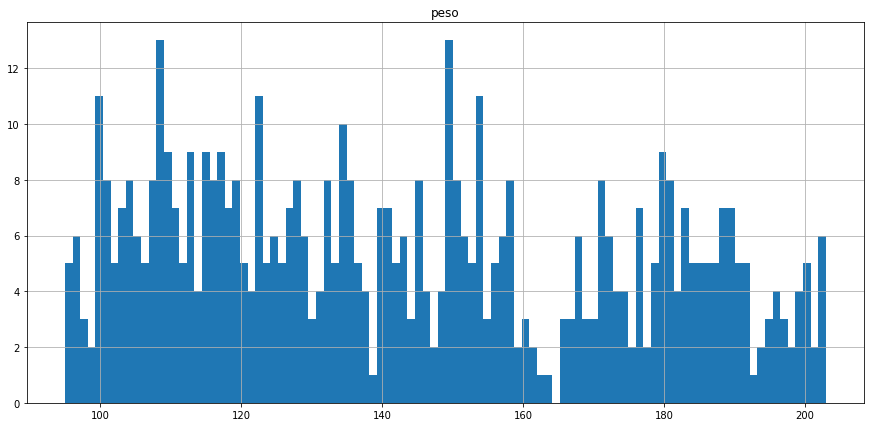

In [14]:
clientes.hist(column = 'peso', figsize=(15,7), bins=100)

In [15]:
#criando um identificador para a variável gênero
from sklearn.preprocessing import LabelEncoder

LE = LabelEncoder()
clientes['genero_number'] = LE.fit_transform(clientes['genero'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa5b56c20d0>]],
      dtype=object)

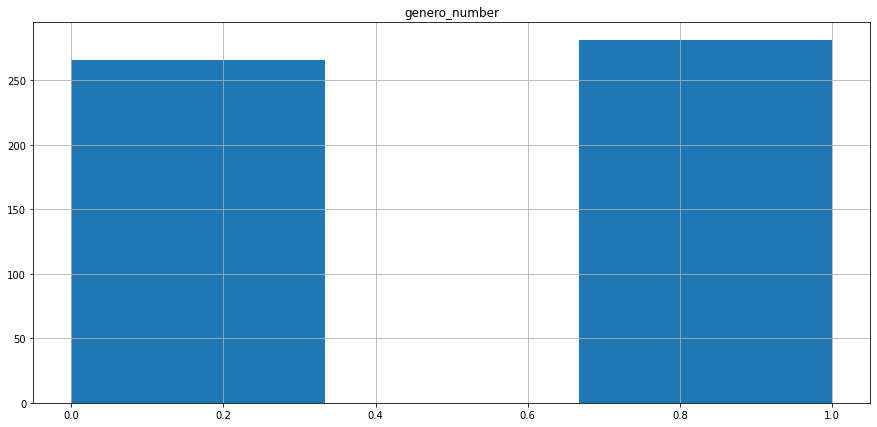

In [16]:
clientes.hist(column = 'genero_number', figsize= (15,7), bins = 3)

##Junções entre as tabelas
Nesta etapa, vou conectar os datasets

In [17]:
clientes_estados = pd.merge(clientes, estados, on='id_estado')
clientes_estados.sort_values('id_cliente')

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil
65,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil
87,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil
...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil
478,544,129.0,157,Masculino,1,1,Acre,ac,Brasil
178,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil


In [18]:
#realiza a junção entre clientes e idades
base_completa = pd.merge(clientes_estados, idade, on='id_cliente').sort_values('id_cliente')

In [19]:
base_completa

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
65,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
87,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
478,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
178,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [20]:
base_completa.reset_index(drop=True) #reseta o index e cria um novo índice

,id_cliente,peso,colesterol,genero,id_estado,genero_number,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
1,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
2,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
3,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
4,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
542,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
543,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
544,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
545,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


##Organizando a base de dados
Nesta etapa, vou alterar os nomes das colunas para facilitar a manipulação

In [21]:
base_completa.rename(columns={'id_cliente': 'cod_cliente', 'genero_number': 'cod_genero'}, inplace = True)
base_completa

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade
0,1,102.0,111,Masculino,23,1,Roraima,rr,Brasil,17
18,2,115.0,135,Masculino,7,1,Distrito Federal,df,Brasil,28
40,3,115.0,136,Masculino,4,1,Amazonas,am,Brasil,62
65,4,140.0,167,Feminino,24,0,Santa Catarina,sc,Brasil,55
87,5,130.0,158,Masculino,26,1,Sergipe,se,Brasil,44
...,...,...,...,...,...,...,...,...,...,...
443,543,172.0,207,Masculino,22,1,Rondônia,ro,Brasil,20
478,544,129.0,157,Masculino,1,1,Acre,ac,Brasil,66
178,545,107.0,115,Masculino,6,1,Ceará,ce,Brasil,36
396,546,117.0,147,Masculino,20,1,Rio Grande do Norte,rn,Brasil,57


In [22]:
#Alterando as linhas da variável sigla_estado para maiúscula
base_completa['sigla_estado'] = base_completa.sigla_estado.str.upper()

#Análise de Dados

##Método Cotovelo
Utilizado para identificar o número de clusters necessários para realizar o agrupamento

In [23]:
from sklearn.cluster import KMeans

In [24]:
#criando uma função para calcular o wcss
def calcular_wcss(dados_cliente):
  wcss = []
  for k in range(1,11):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(X = dados_cliente)
    wcss.append(kmeans.inertia_)
  return wcss

In [25]:
dados_cliente = base_completa[['peso', 'colesterol', 'idade']]
wcss_clientes = calcular_wcss(dados_cliente)

In [26]:
import plotly.express as px #Criação de gráficos dinamicos
import plotly.offline as py
import plotly.graph_objects as go #Para criação e concatenização de gráficos

In [27]:
grafico_wcss = px.line(
    x = range(1,11),
    y = wcss_clientes
)
fig = go.Figure(grafico_wcss)
fig.update_layout(title = "Calculando o WCSS",
                  xaxis_title = "Número de Clusters",
                  yaxis_title = 'Valor do WCSS',
                  template = 'plotly_white')
fig.show()

In [28]:
kmeans_clientes = KMeans(n_clusters = 3, random_state=0)
base_completa['cluster'] = kmeans_clientes.fit_predict(dados_cliente)
#atribuo a cada linha um cluster, baseado em dados_cliente

#Criando os centroides

In [29]:
centroides_clusters = kmeans_clientes.cluster_centers_
centroides_clusters

array([[181.96141176, 217.07647059,  42.69411765],
       [110.25      , 125.62765957,  43.5212766 ],
       [141.80825397, 173.04761905,  42.15343915]])

##Visualizando os centroides

In [30]:
grafico = px.scatter(x = base_completa['peso'],
                     y = base_completa['colesterol'],
                     color = base_completa['cluster'])
#Cria o gráfico utilizando os dados da base completa e colorindo de acordo com o cluster atribuído lá atrás
grafico_controle = px.scatter(x = centroides_clusters[:,0], y = centroides_clusters[:,1], size = [7,7,7])
#Permite a visualização dos centroides no gráfico
grafico_final_petala = go.Figure(data = grafico.data + grafico_controle.data)
grafico_final_petala.show()

##Deixando o gráfico mais bonito

In [31]:
grafico = px.scatter(x= base_completa['colesterol'],
                     y = base_completa['peso'],
                     color = base_completa['cluster'])
fig = go.Figure(grafico)
fig.update_layout(title = 'Analise de clusters',
                  xaxis_title = 'Colesterol',
                  yaxis_title = 'Peso')
fig.show()

#Criando função para Gerar Gráficos

In [37]:
def plotar_grafico(a, b, labela, labelb):
  grafico = px.scatter(x= a,
                     y = b,
                     color = base_completa['cluster']
                     )

  fig = go.Figure(grafico)
  fig.update_layout(title = "Analise de Clusters",
                  xaxis_title = labela,
                  yaxis_title = labelb)
  fig.show()

In [ ]:
plotar_grafico(base_completa['colesterol'], base_completa['peso'], "colesterol", "peso")

#Segmentando os clientes baseado nos clusters

In [40]:
from pandas.core.internals import base
#criando o gráfico apenas declarando x e y
x = 'colesterol'
y = 'peso'

plotar_grafico(base_completa[x], base_completa[y], x, y)

In [41]:
cluster_clientes = base_completa

#segmentando os clientes baseado na análise dos clusters

cluster_clientes.loc[cluster_clientes['cluster']==0,'nome_cluster'] = 'Alto Risco'
cluster_clientes.loc[cluster_clientes['cluster']==1,'nome_cluster'] = 'Baixo Risco'
cluster_clientes.loc[cluster_clientes['cluster']==2,'nome_cluster'] = 'Risco Moderado'


,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,170.0,42.694118,15.231564,16.0,31.0,43.0,55.75,69.0
Baixo Risco,188.0,43.521277,15.009251,17.0,31.0,42.0,57.00,70.0
Risco Moderado,189.0,42.153439,15.294024,16.0,29.0,42.0,54.00,70.0


In [42]:
cluster_clientes.groupby('nome_cluster')['idade'].describe()

,count,mean,std,min,25%,50%,75%,max
nome_cluster,,,,,,,,
Alto Risco,170.0,42.694118,15.231564,16.0,31.0,43.0,55.75,69.0
Baixo Risco,188.0,43.521277,15.009251,17.0,31.0,42.0,57.00,70.0
Risco Moderado,189.0,42.153439,15.294024,16.0,29.0,42.0,54.00,70.0


In [43]:
cluster_clientes.groupby('nome_cluster')['estado'].describe()

,count,unique,top,freq
nome_cluster,,,,
Alto Risco,170,27,Rio Grande do Sul,10
Baixo Risco,188,27,Amazonas,13
Risco Moderado,189,27,Mato Grosso do Sul,13


In [47]:
cluster_clientes.query('nome_cluster == "Risco Moderado" & estado == "Mato Grosso do Sul"')

,cod_cliente,peso,colesterol,genero,id_estado,cod_genero,estado,sigla_estado,pais,idade,cluster,nome_cluster
502,64,143.44,211,Masculino,12,1,Mato Grosso do Sul,MS,Brasil,58,2,Risco Moderado
503,88,140.00,168,Feminino,12,0,Mato Grosso do Sul,MS,Brasil,25,2,Risco Moderado
507,174,129.00,156,Masculino,12,1,Mato Grosso do Sul,MS,Brasil,28,2,Risco Moderado
510,251,154.00,195,Feminino,12,0,Mato Grosso do Sul,MS,Brasil,19,2,Risco Moderado
512,296,155.00,191,Masculino,12,1,Mato Grosso do Sul,MS,Brasil,45,2,Risco Moderado
514,307,126.00,152,Feminino,12,0,Mato Grosso do Sul,MS,Brasil,22,2,Risco Moderado
516,442,125.00,154,Masculino,12,1,Mato Grosso do Sul,MS,Brasil,59,2,Risco Moderado
518,453,145.00,176,Feminino,12,0,Mato Grosso do Sul,MS,Brasil,25,2,Risco Moderado
519,456,134.00,168,Masculino,12,1,Mato Grosso do Sul,MS,Brasil,29,2,Risco Moderado
520,464,144.00,171,Feminino,12,0,Mato Grosso do Sul,MS,Brasil,32,2,Risco Moderado


In [48]:
cluster_clientes.groupby(['nome_cluster', 'genero'])['peso'].describe()

count        mean        std     min    25%     50%  \
nome_cluster   genero                                                           
Alto Risco     Feminino    71.0  182.823099  11.441636  143.44  178.0  185.00   
               Masculino   99.0  181.343434  11.701353  159.00  172.0  180.00   
Baixo Risco    Feminino    84.0  111.166667   7.829252   96.00  107.0  112.00   
               Masculino  104.0  109.509615   8.139554   95.00  103.0  108.00   
Risco Moderado Feminino   111.0  142.193153  10.351079  124.00  134.0  141.00   
               Masculino   78.0  141.260513  10.220661  124.00  132.0  143.72   

                             75%    max  
nome_cluster   genero                    
Alto Risco     Feminino   191.00  203.0  
               Masculino  188.00  203.0  
Baixo Risco    Feminino   117.00  126.0  
               Masculino  117.00  126.0  
Risco Moderado Feminino   152.50  159.0  
               Masculino  150.75  157.0

In [49]:
cluster_clientes.to_csv('classificacao_clientes.csv', sep = ';', encoding = 'latin1')